# Exploración de datos

## Imports

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

from scipy import stats

## Read file

In [101]:
df = pd.read_csv('../data/train.csv')

Se podrían cargar nuevas features y realizar todo este mismo análisis sumando nuevas potenciales variables predictoras útiles.

In [102]:
def removeOutliers(df, features, target):
    df_zscore = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    
    x_zscore = df_zscore[features].values
    y_zscore = df_zscore[target].values

    x_zscore = x_zscore.reshape(len(x_zscore),len(features))
    y_zscore = y_zscore.reshape(len(y_zscore),len(target))
    
    x = pd.DataFrame(data=x_zscore, columns=features)
    y = pd.DataFrame(data=y_zscore, columns=target)
    
    return x, y

In [103]:
objects = ["tipodepropiedad", "provincia"]
features = ["antiguedad", "habitaciones", "banos", "metroscubiertos", "metrostotales", "escuelascercanas", "centroscomercialescercanos", "lat", "lng"]
target = ["precio"]

## Análisis inicial

Primero observamos más o menos la forma de la matriz de datos.

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240000 non-null  int64  
 1   titulo                      234613 non-null  object 
 2   descripcion                 238381 non-null  object 
 3   tipodepropiedad             239954 non-null  object 
 4   direccion                   186928 non-null  object 
 5   ciudad                      239628 non-null  object 
 6   provincia                   239845 non-null  object 
 7   antiguedad                  196445 non-null  float64
 8   habitaciones                217529 non-null  float64
 9   garages                     202235 non-null  float64
 10  banos                       213779 non-null  float64
 11  metroscubiertos             222600 non-null  float64
 12  metrostotales               188533 non-null  float64
 13  idzona        

Se observa que en varias variables de potencial uso predictor se tienen bastantes celdas en `NaN`. Una opción sería realizar un `df.dropna()` para eliminar dichas entradas, pues nos traerán problemas con los cálculos, pero eso lleva a que perdamos información sobre el resto de las features de esa entrada.

In [105]:
df_drop_con = df.dropna()

df_drop_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49881 entries, 1 to 239998
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          49881 non-null  int64  
 1   titulo                      49881 non-null  object 
 2   descripcion                 49881 non-null  object 
 3   tipodepropiedad             49881 non-null  object 
 4   direccion                   49881 non-null  object 
 5   ciudad                      49881 non-null  object 
 6   provincia                   49881 non-null  object 
 7   antiguedad                  49881 non-null  float64
 8   habitaciones                49881 non-null  float64
 9   garages                     49881 non-null  float64
 10  banos                       49881 non-null  float64
 11  metroscubiertos             49881 non-null  float64
 12  metrostotales               49881 non-null  float64
 13  idzona                      49

Se ve que pasamos de tener 240.000 entradas a tener ~50.000. Estamos perdiendo el ~80% de las entradas. Si nos deshiciéramos primero de las variables latitud y longitud que tienen cerca del 50% de las entradas en `NaN`

In [106]:
df.drop(["lat","lng"], axis=1).dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99084 entries, 1 to 239998
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          99084 non-null  int64  
 1   titulo                      99084 non-null  object 
 2   descripcion                 99084 non-null  object 
 3   tipodepropiedad             99084 non-null  object 
 4   direccion                   99084 non-null  object 
 5   ciudad                      99084 non-null  object 
 6   provincia                   99084 non-null  object 
 7   antiguedad                  99084 non-null  float64
 8   habitaciones                99084 non-null  float64
 9   garages                     99084 non-null  float64
 10  banos                       99084 non-null  float64
 11  metroscubiertos             99084 non-null  float64
 12  metrostotales               99084 non-null  float64
 13  idzona                      99

De esta manera perdemos menos entradas, pero no vamos a poder utilizar la información geográfica para las predicciones.

Otra opción sería completar los valores ausentes de manera que puedan utilizarse las entradas perdidas. Una manera de hacer esto sería completando con la _mediana_ de cada _feature_.

In [107]:
variables = ["tipodepropiedad", "provincia", "antiguedad", "habitaciones", "banos", "metroscubiertos", "metrostotales", "gimnasio", "usosmultiples", "piscina", "escuelascercanas", "centroscomercialescercanos", "lat", "lng", "precio"]

df_sin_nan_con = df[variables]
df_sin_nan_con = df_sin_nan_con[df_sin_nan_con['tipodepropiedad'].notnull()]
df_sin_nan_con = df_sin_nan_con[df_sin_nan_con['provincia'].notnull()]

df_sin_nan_con = df_sin_nan_con.fillna(df_sin_nan_con.median())

df_sin_nan_con

,tipodepropiedad,provincia,antiguedad,habitaciones,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,lat,lng,precio
0,Apartamento,Distrito Federal,5.0,2.0,2.0,80.0,80.0,0.0,0.0,0.0,0.0,0.0,19.543143,-99.240348,2273000.0
1,Casa en condominio,Distrito Federal,10.0,3.0,2.0,268.0,180.0,0.0,0.0,0.0,1.0,1.0,19.310205,-99.227655,3600000.0
2,Casa,Jalisco,5.0,3.0,2.0,144.0,166.0,0.0,0.0,0.0,0.0,0.0,19.543143,-99.240348,1200000.0
3,Casa,Edo. de México,1.0,2.0,1.0,63.0,67.0,0.0,0.0,0.0,1.0,1.0,19.301890,-99.688015,650000.0
4,Apartamento,Jalisco,10.0,2.0,1.0,95.0,95.0,0.0,0.0,0.0,0.0,0.0,19.543143,-99.240348,1150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,Casa,Edo. de México,0.0,2.0,1.0,67.0,155.0,0.0,0.0,0.0,0.0,0.0,19.543143,-99.240348,650000.0
239996,Casa,Edo. de México,0.0,3.0,3.0,200.0,250.0,0.0,0.0,0.0,1.0,1.0,19.294665,-99.692916,1940000.0
239997,Apartamento,Distrito Federal,20.0,2.0,2.0,138.0,138.0,0.0,0.0,0.0,0.0,0.0,19.543143,-99.240348,3400000.0
239998,Casa,Distrito Federal,20.0,4.0,4.0,235.0,137.0,1.0,0.0,0.0,1.0,1.0,19.366651,-99.082246,2890000.0


## Remoción de outliers

In [108]:
variables = ["antiguedad", "habitaciones", "banos", "metroscubiertos", "metrostotales", "escuelascercanas", "centroscomercialescercanos", "lat", "lng", "precio"]

x_drop, y_drop = removeOutliers(df_drop_con[variables], features, target)
df_drop = pd.concat([x_drop, y_drop], axis=1, sort=False)
df_drop

,antiguedad,habitaciones,banos,metroscubiertos,metrostotales,escuelascercanas,centroscomercialescercanos,lat,lng,precio
0,10.0,3.0,2.0,268.0,180.0,1.0,1.0,19.310205,-99.227655,3600000.0
1,1.0,2.0,1.0,63.0,67.0,1.0,1.0,19.301890,-99.688015,650000.0
2,5.0,2.0,1.0,75.0,90.0,0.0,1.0,19.300612,-99.148475,1100000.0
3,2.0,4.0,3.0,293.0,293.0,0.0,0.0,20.672612,-87.037968,4200000.0
4,0.0,3.0,2.0,170.0,141.0,1.0,1.0,20.682878,-100.317503,1500000.0
...,...,...,...,...,...,...,...,...,...,...
45600,20.0,2.0,1.0,68.0,68.0,1.0,1.0,19.403309,-99.119023,1450000.0
45601,1.0,3.0,3.0,150.0,150.0,0.0,0.0,20.615574,-103.456215,1650000.0
45602,3.0,2.0,2.0,160.0,90.0,0.0,0.0,20.604484,-103.450049,1350000.0
45603,0.0,3.0,3.0,200.0,250.0,1.0,1.0,19.294665,-99.692916,1940000.0


In [109]:
x_sin_nan, y_sin_nan = removeOutliers(df_sin_nan_con[variables], features, target)
df_sin_nan = pd.concat([x_sin_nan, y_sin_nan], axis=1, sort=False)
df_sin_nan

,antiguedad,habitaciones,banos,metroscubiertos,metrostotales,escuelascercanas,centroscomercialescercanos,lat,lng,precio
0,5.0,2.0,2.0,80.0,80.0,0.0,0.0,19.543143,-99.240348,2273000.0
1,10.0,3.0,2.0,268.0,180.0,1.0,1.0,19.310205,-99.227655,3600000.0
2,5.0,3.0,2.0,144.0,166.0,0.0,0.0,19.543143,-99.240348,1200000.0
3,1.0,2.0,1.0,63.0,67.0,1.0,1.0,19.301890,-99.688015,650000.0
4,10.0,2.0,1.0,95.0,95.0,0.0,0.0,19.543143,-99.240348,1150000.0
...,...,...,...,...,...,...,...,...,...,...
220578,0.0,2.0,1.0,67.0,155.0,0.0,0.0,19.543143,-99.240348,650000.0
220579,0.0,3.0,3.0,200.0,250.0,1.0,1.0,19.294665,-99.692916,1940000.0
220580,20.0,2.0,2.0,138.0,138.0,0.0,0.0,19.543143,-99.240348,3400000.0
220581,20.0,4.0,4.0,235.0,137.0,1.0,1.0,19.366651,-99.082246,2890000.0


Corresponde separar la base de datos entre los **features** o variables predictoras y el **target** o variable a predecir.

In [124]:
# Variable target
prices      = df["precio"]
prices_drop = df_drop["precio"]
prices_nan  = df_sin_nan["precio"]

# Modelo dropeando los NaN
features_drop = df_drop[variables[:-1]]
features_nan  = df_sin_nan[variables[:-1]]

### Un poco de exploración de datos

In [125]:
print("DROP DATAFRAME\n")

# Minimum price of the data
minimum_price = np.amin(prices_drop)

# Maximum price of the data
maximum_price = np.amax(prices_drop)

# Mean price of the data
mean_price = np.mean(prices_drop)

# Median price of the data
median_price = np.median(prices_drop)

# Standard deviation of prices of the data
std_price = np.std(prices_drop)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:.2f}".format(minimum_price)) 
print("Maximum price: ${:.2f}".format(maximum_price))
print("Mean price: ${:.2f}".format(mean_price))
print("Median price ${:.2f}".format(median_price))
print("Standard deviation of prices: ${:.2f}".format(std_price))

DROP DATAFRAME

Statistics for Boston housing dataset:

Minimum price: $310000.00
Maximum price: $7665000.00
Mean price: $2054846.84
Median price $1634967.00
Standard deviation of prices: $1502587.87


In [126]:
print("LLENADO DE NAN DATAFRAME\n")

# Minimum price of the data
minimum_price = np.amin(prices_nan)

# Maximum price of the data
maximum_price = np.amax(prices_nan)

# Mean price of the data
mean_price = np.mean(prices_nan)

# Median price of the data
median_price = np.median(prices_nan)

# Standard deviation of prices of the data
std_price = np.std(prices_nan)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:.2f}".format(minimum_price)) 
print("Maximum price: ${:.2f}".format(maximum_price))
print("Mean price: ${:.2f}".format(mean_price))
print("Median price ${:.2f}".format(median_price))
print("Standard deviation of prices: ${:.2f}".format(std_price))

LLENADO DE NAN DATAFRAME

Statistics for Boston housing dataset:

Minimum price: $310000.00
Maximum price: $8982360.00
Mean price: $2355033.47
Median price $1800000.00
Standard deviation of prices: $1818972.06


In [127]:
print("ORIGINAL DATAFRAME\n")

# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:.2f}".format(minimum_price)) 
print("Maximum price: ${:.2f}".format(maximum_price))
print("Mean price: ${:.2f}".format(mean_price))
print("Median price ${:.2f}".format(median_price))
print("Standard deviation of prices: ${:.2f}".format(std_price))

ORIGINAL DATAFRAME

Statistics for Boston housing dataset:

Minimum price: $310000.00
Maximum price: $12525000.00
Mean price: $2530838.35
Median price $1850000.00
Standard deviation of prices: $2152547.31


Las siguientes gráficas nos muestran la distribución de cada variable (diagonal) y luego un gráfico de dispersión de a pares entre variables. Los gráficos de a pares no parecen arrojar mucha luz sobre el modelado.

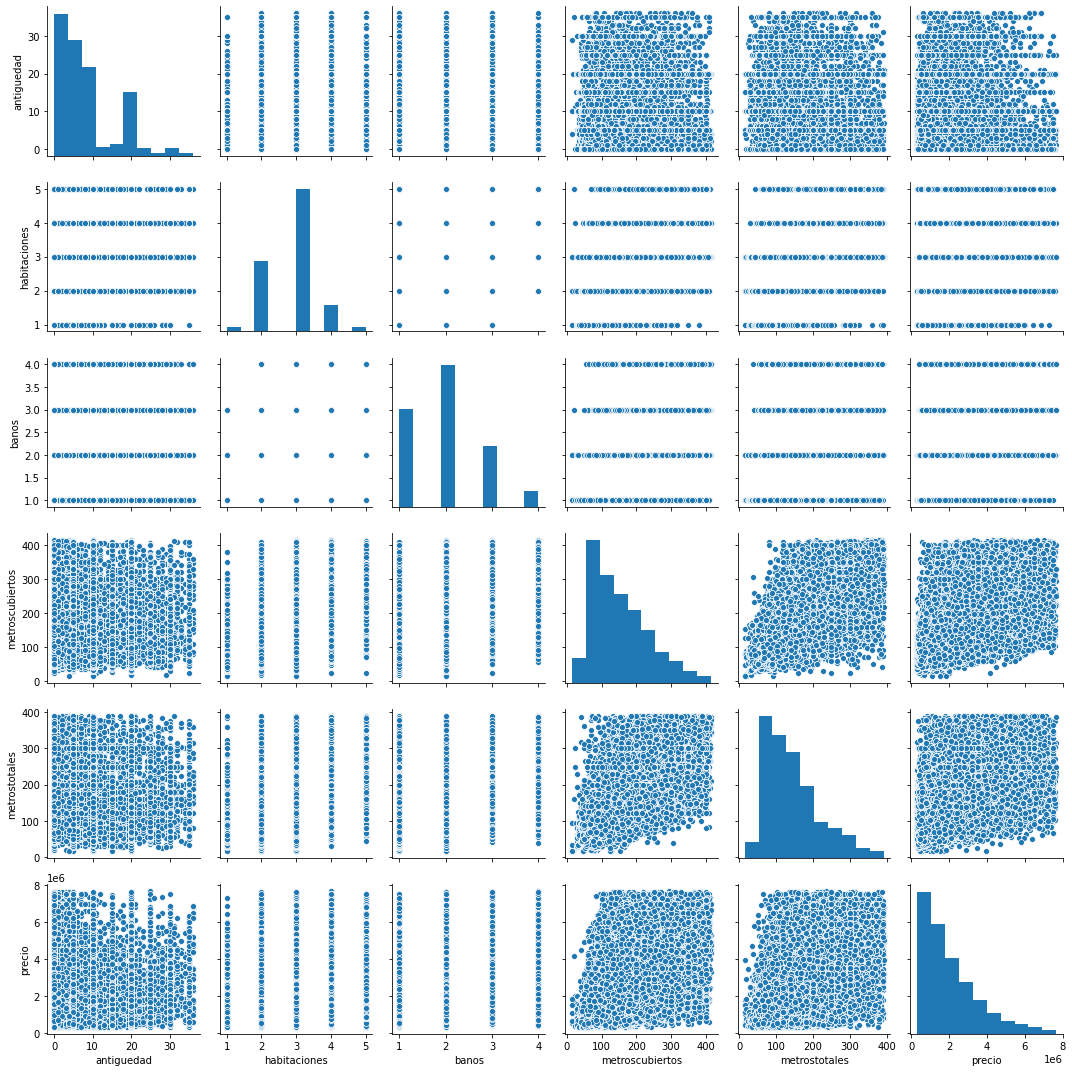

In [112]:
# Calculate and show pairplot
plotVar = ["antiguedad", "habitaciones", "banos", "metroscubiertos", "metrostotales", "precio"]
data = df_drop[plotVar]

sns.pairplot(data, height=2.5)
plt.tight_layout()

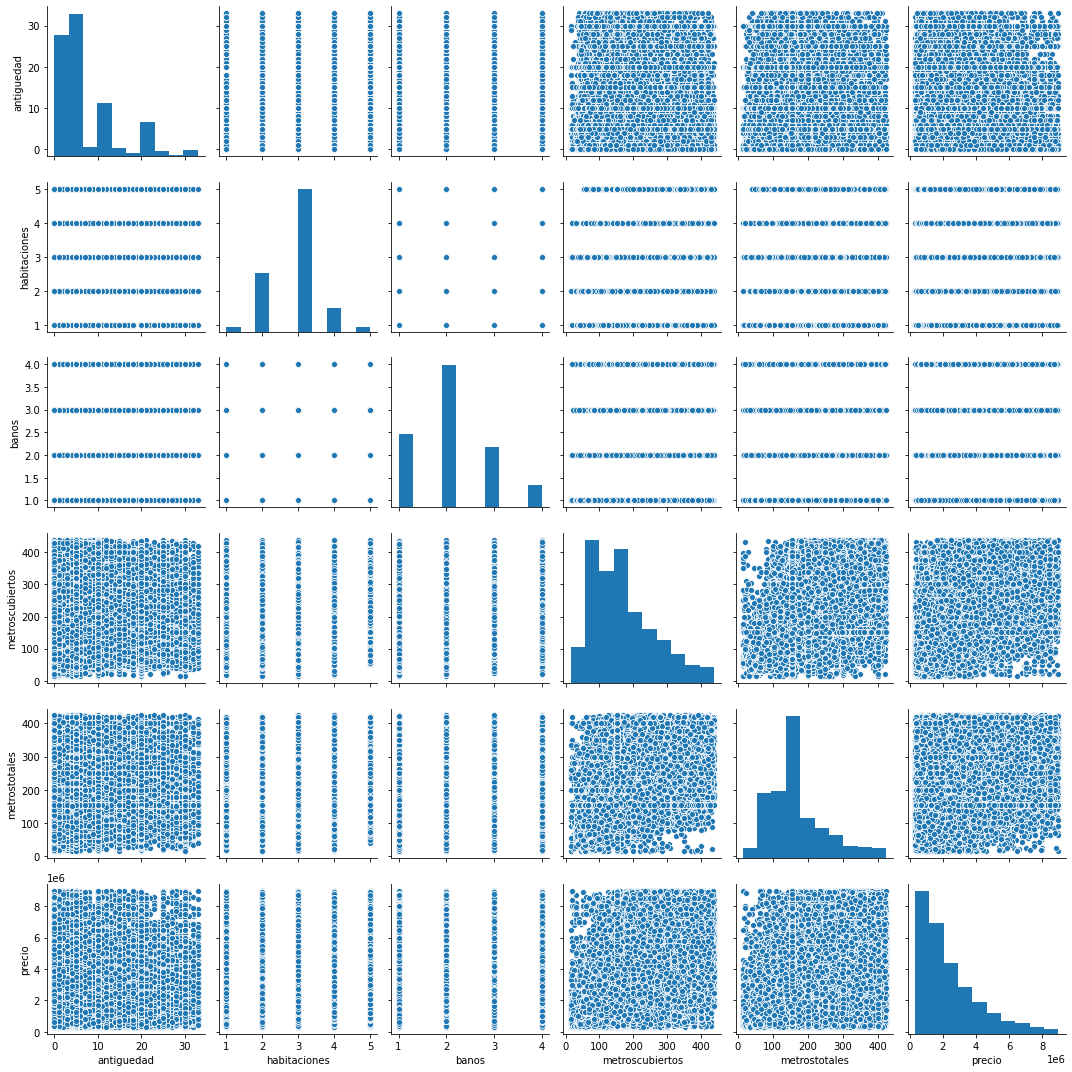

In [113]:
data = df_sin_nan[plotVar]

sns.pairplot(data, height=2.5)
plt.tight_layout()

El siguiente paso, sería analizar el grado de correlación que hay entre nuestras variables. De esta manera podremos encontrar cuál es la variable más correlacionada con el precio, pero además podremos encontrar variables altamente correlacionadas entre sí, lo que implicará que en caso de agregar una de ellas a nuestro modelo, luego la otra no brindará información nueva (independiente).

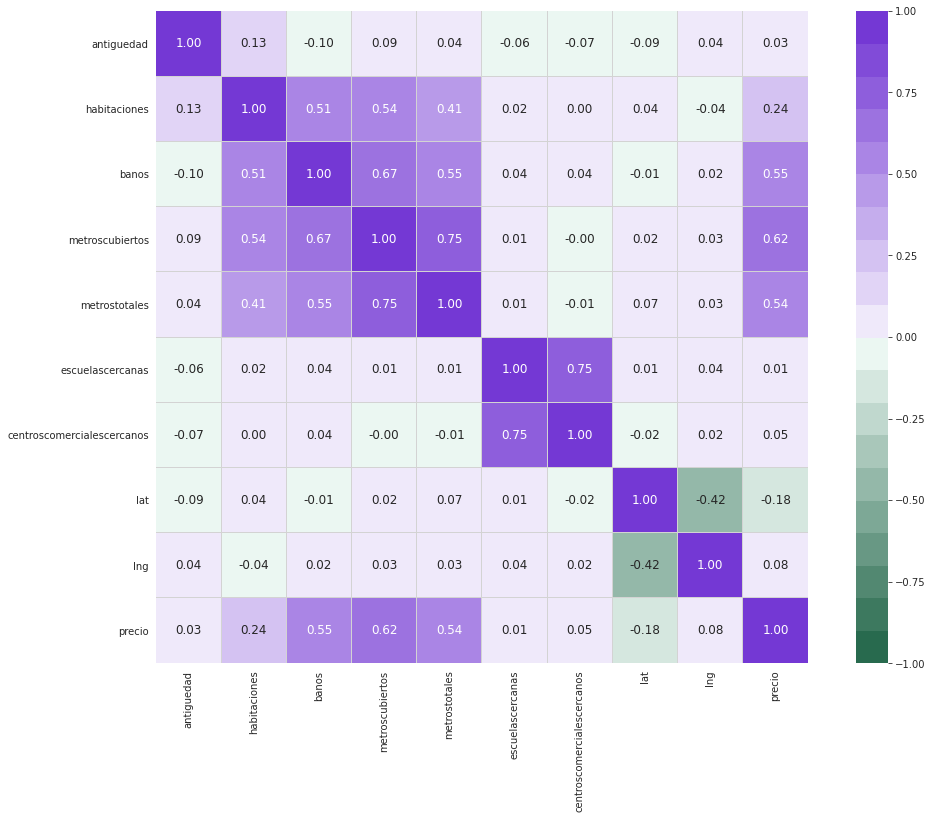

In [114]:
# Correlación entre variables
correlation = df_drop.corr()

paleta = sns.diverging_palette(150, 275, s=80, l=40, n=20)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(17, 12))
    ax = sns.heatmap(correlation,
                     annot=True,
                     annot_kws={'size': 12},
                     fmt='.2f',
                     vmax=1, 
                     vmin=-1, 
                     square=True, 
                     linewidths=.01, 
                     linecolor='lightgray', 
                     cmap=paleta)

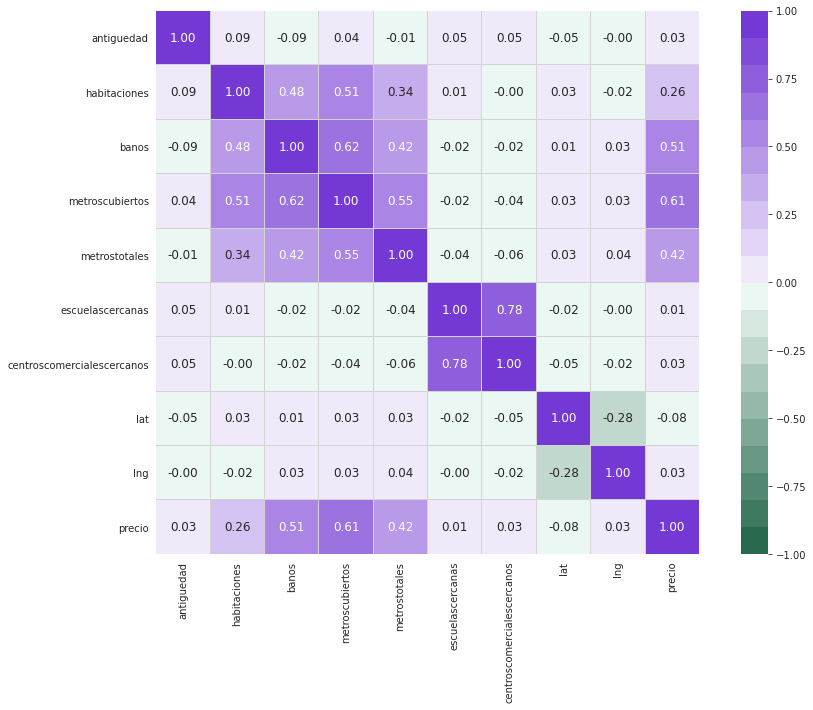

In [115]:
# Correlación entre variables
correlation = df_sin_nan.corr()

paleta = sns.diverging_palette(150, 275, s=80, l=40, n=20)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(correlation,
                     annot=True,
                     annot_kws={'size': 12},
                     fmt='.2f',
                     vmax=1, 
                     vmin=-1, 
                     square=True, 
                     linewidths=.01, 
                     linecolor='lightgray', 
                     cmap=paleta)